In [1]:
# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Data Description:
# Murder -- Muder rates in different places of United States
# Assualt- Assualt rate in different places of United States
# UrbanPop - urban population in different places of United States
# Rape - Rape rate in different places of United States

## Hierarchical Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [3]:
df1=pd.read_csv('crime_data.csv')
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df1.shape

(50, 5)

In [6]:
df1.size

250

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


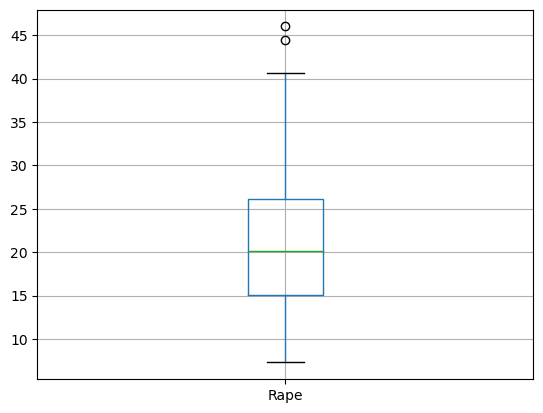

In [8]:
df1.boxplot('Rape')
plt.show()

In [9]:
Q3=df1['Rape'].quantile(0.75)
Q3

26.175

In [10]:
Q1=df1['Rape'].quantile(0.25)
Q1

15.075

In [11]:
IQR=Q3-Q1
IQR

11.100000000000001

In [12]:
lower_extreme= Q1-1.5*IQR
lower_extreme

-1.5750000000000028

In [13]:
upper_extreme= Q3+1.5*IQR
upper_extreme

42.825

In [14]:
df1_outliers= df1[(df1['Rape']<lower_extreme) | (df1['Rape']>upper_extreme)]
df1_outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


In [15]:
df1_no_outliers= df1[(df1['Rape']>lower_extreme) & (df1['Rape']<upper_extreme)]
df1_no_outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8
10,Hawaii,5.3,46,83,20.2


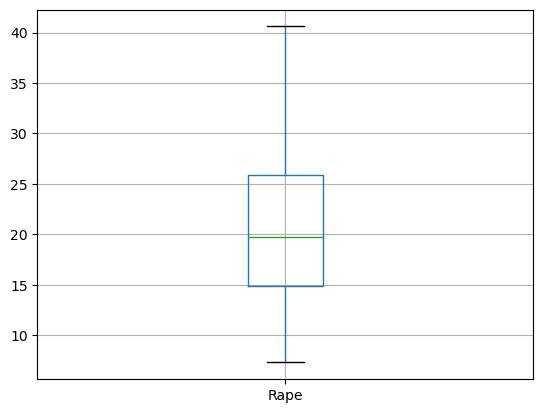

In [16]:
df1_no_outliers.boxplot('Rape')
plt.show()

In [17]:
features1=df1_no_outliers.drop('Unnamed: 0',axis=1)
features1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8
10,5.3,46,83,20.2


In [18]:
std_scale=StandardScaler()

In [19]:
features1=pd.DataFrame(std_scale.fit_transform(features1),columns=features1.columns)
features1

,Murder,Assault,UrbanPop,Rape
0,1.278681,0.837320,-0.532911,0.120627
1,0.103677,1.542644,1.013117,1.340909
2,0.264952,0.277924,-1.095104,-0.091054
3,0.311030,1.323751,1.786132,2.536287
4,0.057598,0.448175,0.872569,2.299701
5,-1.002209,-0.694937,0.802295,-1.137010
6,-0.403188,0.861641,0.450925,-0.551773
7,1.785545,2.041236,1.013117,1.452975
8,2.246331,0.533300,-0.392363,0.693413
9,-0.541423,-1.473227,1.223940,-0.003891


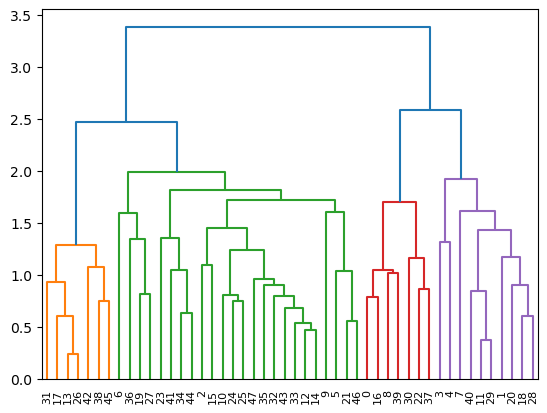

In [20]:
dendrogram1=sch.dendrogram(sch.linkage(features1,method='average'))
plt.show()

In [21]:
agg1= AgglomerativeClustering(n_clusters=4,linkage='average')
agg1

AgglomerativeClustering(linkage='average', n_clusters=4)

In [22]:
cluster1=agg1.fit(features1)

In [23]:
cluster1.labels_

array([2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1, 0,
       2, 0, 0, 0, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 0, 0], dtype=int64)

In [24]:
np.unique(cluster1.labels_)

array([0, 1, 2, 3], dtype=int64)

In [25]:
silhouette_score(features1,cluster1.labels_)

0.33225638930561335

## K-means Clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans1=KMeans(n_clusters=4)

In [28]:
cluster1=kmeans1.fit(features1)
cluster1

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
np.unique(cluster1.labels_)

array([0, 1, 2, 3])

In [30]:
cluster1.cluster_centers_ 

array([[-0.45934591, -0.34379512,  0.58268893, -0.18055185],
       [-0.93309138, -1.07753391, -0.94915004, -1.00291287],
       [ 1.44859557,  0.93004559, -0.83157616,  0.1470875 ],
       [ 0.71735982,  1.097118  ,  0.8789579 ,  1.34090882]])

In [31]:
features1['cluster']=cluster1.labels_    
features1

,Murder,Assault,UrbanPop,Rape,cluster
0,1.278681,0.837320,-0.532911,0.120627,2
1,0.103677,1.542644,1.013117,1.340909,3
2,0.264952,0.277924,-1.095104,-0.091054,2
3,0.311030,1.323751,1.786132,2.536287,3
4,0.057598,0.448175,0.872569,2.299701,3
5,-1.002209,-0.694937,0.802295,-1.137010,0
6,-0.403188,0.861641,0.450925,-0.551773,0
7,1.785545,2.041236,1.013117,1.452975,3
8,2.246331,0.533300,-0.392363,0.693413,2
9,-0.541423,-1.473227,1.223940,-0.003891,0


In [32]:
import seaborn as sns

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


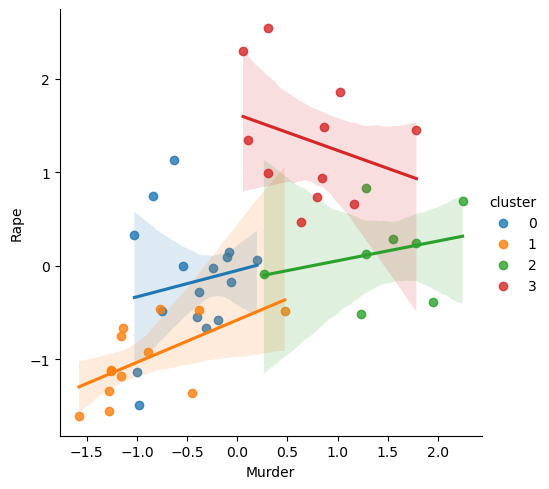

In [33]:
sns.lmplot(data=features1,x='Murder',y='Rape',hue='cluster')
plt.show()

##### Optimum value of the cluster

In [34]:
cluster1.inertia_

52.98874685130602

In [35]:
# to find the inertia of each cluster we need to write a for loop

inertia=[]
for i in range(1,11):
    kmeans1=KMeans(n_clusters=i)
    kmeans1.fit(features1)
    inertia.append(kmeans1.inertia_)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [36]:
inertia

[255.91666666666666,
 114.70318600067998,
 80.37877017840302,
 52.98874685130602,
 46.68315465387495,
 41.733151247047545,
 38.22789541054293,
 34.283976907077125,
 31.363261248338635,
 28.266997113468]

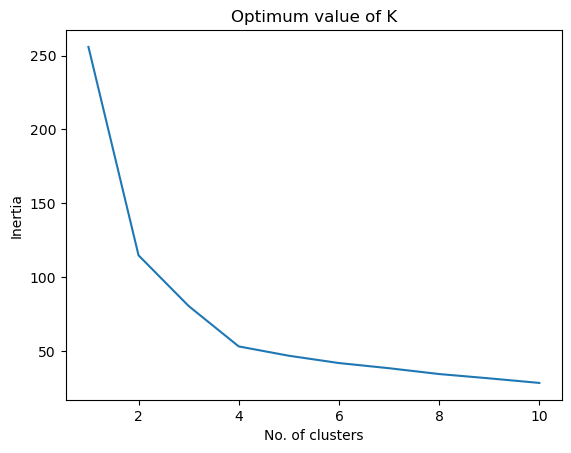

In [37]:
plt.plot(range(1,11),inertia)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Optimum value of K')
plt.show()

## DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
features1=features1.drop('cluster',axis=1)
features1

,Murder,Assault,UrbanPop,Rape
0,1.278681,0.837320,-0.532911,0.120627
1,0.103677,1.542644,1.013117,1.340909
2,0.264952,0.277924,-1.095104,-0.091054
3,0.311030,1.323751,1.786132,2.536287
4,0.057598,0.448175,0.872569,2.299701
5,-1.002209,-0.694937,0.802295,-1.137010
6,-0.403188,0.861641,0.450925,-0.551773
7,1.785545,2.041236,1.013117,1.452975
8,2.246331,0.533300,-0.392363,0.693413
9,-0.541423,-1.473227,1.223940,-0.003891


In [40]:
array=features1.values
array

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

In [41]:
dbscan=DBSCAN(eps=1.2,min_samples=4)
dbscan.fit(array)

DBSCAN(eps=1.2, min_samples=4)

In [42]:
dbscan.labels_

array([ 0,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [43]:
clusters= pd.DataFrame(dbscan.labels_,columns=["Clusters"])
clusters

,Clusters
0,0
1,1
2,1
3,-1
4,-1
5,1
6,-1
7,-1
8,0
9,1


In [44]:
silhouette_score(array,dbscan.labels_)

0.21702357636837413

In [45]:
pd.concat([features1,clusters],axis=1)

,Murder,Assault,UrbanPop,Rape,Clusters
0,1.278681,0.837320,-0.532911,0.120627,0
1,0.103677,1.542644,1.013117,1.340909,1
2,0.264952,0.277924,-1.095104,-0.091054,1
3,0.311030,1.323751,1.786132,2.536287,-1
4,0.057598,0.448175,0.872569,2.299701,-1
5,-1.002209,-0.694937,0.802295,-1.137010,1
6,-0.403188,0.861641,0.450925,-0.551773,-1
7,1.785545,2.041236,1.013117,1.452975,-1
8,2.246331,0.533300,-0.392363,0.693413,0
9,-0.541423,-1.473227,1.223940,-0.003891,1


In [46]:
# 2) Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
# Draw the inferences from the clusters obtained.

# Data Description:
 
# The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
# For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. 
# The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers
# ID --Unique ID
# Balance--Number of miles eligible for award travel
# Qual_mile--Number of miles counted as qualifying for Topflight status
# cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
# cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
# cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

# 1 = under 5,000
# 2 = 5,000 - 10,000
# 3 = 10,001 - 25,000
# 4 = 25,001 - 50,000
# 5 = over 50,000

# Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
# Bonus_trans--Number of non-flight bonus transactions in the past 12 months
# Flight_miles_12mo--Number of flight miles in the past 12 month
# Flight_trans_12--Number of flight transactions in the past 12 months
# Days_since_enrolled--Number of days since enrolled in flier program
# Award--whether that person had award flight (free flight) or not

## Hierarchical Clustering

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [48]:
df2=pd.read_csv('EastWestAirlines.csv')
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [49]:
df2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
df2.shape

(3999, 12)

In [51]:
df2.size

47988

In [52]:
df2.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [53]:
df2.duplicated().any()

False

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [55]:
features2=df2.drop('ID#',axis=1)
features2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [56]:
features2=pd.DataFrame(std_scale.fit_transform(features2),columns=features2.columns)
features2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


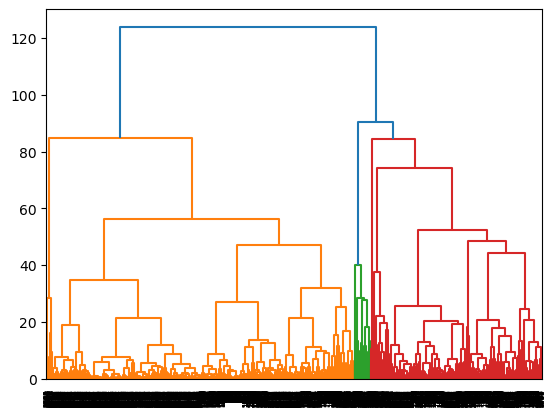

In [57]:
dendrogram2=sch.dendrogram(sch.linkage(features2,method='ward'))
plt.show()

In [58]:
agg2=AgglomerativeClustering(n_clusters=3,linkage='average')
agg2

AgglomerativeClustering(linkage='average', n_clusters=3)

In [59]:
cluster2=agg2.fit(features2)

In [60]:
cluster2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
np.unique(cluster2.labels_)

array([0, 1, 2], dtype=int64)

In [62]:
silhouette_score(features2,cluster2.labels_)

0.7838667595062349

### K-means Clustering

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans2=KMeans(n_clusters=15)

In [65]:
cluster2=kmeans2.fit(features2)
cluster2

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15)

In [66]:
np.unique(cluster2.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [67]:
cluster2.cluster_centers_

array([[-1.86518990e-01, -4.72423320e-02, -6.55583872e-01,
        -9.82418871e-02, -6.27665798e-02, -4.59335642e-01,
        -4.63100255e-01, -1.41230701e-01, -1.28742524e-01,
         7.19156624e-02,  1.30391816e+00],
       [ 7.36275686e-01, -3.50208080e-02,  2.01590450e+00,
        -9.82418871e-02, -3.86037426e-02,  2.48014679e+00,
         1.14768189e+00, -5.10372328e-03,  8.45492523e-03,
         6.99700205e-01,  1.12809234e+00],
       [-1.13053570e-01, -1.45492688e-01,  9.38521000e-02,
        -9.82418871e-02, -6.27665798e-02, -1.50517829e-01,
         6.36679624e-01, -2.42931325e-01, -2.69756034e-01,
        -6.70010257e-01, -7.61843717e-01],
       [-4.51641175e-01, -1.35711142e-01, -7.60100532e-01,
        -9.82418871e-02, -6.27665798e-02, -6.28724728e-01,
        -8.43039194e-01, -2.57677177e-01, -2.68649843e-01,
        -1.02057162e+00, -7.66919299e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
  

In [68]:
features2['cluster']=cluster2.labels_    
features2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,9
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,9
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,9
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,9
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,13
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,3


C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


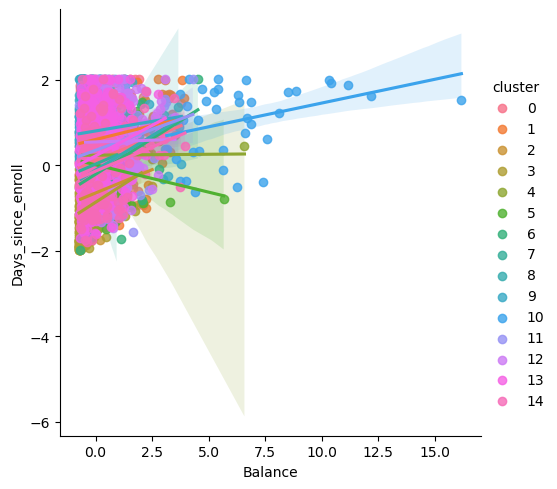

In [69]:
sns.lmplot(data=features2,x='Balance',y='Days_since_enroll',hue='cluster')
plt.show()

##### Optimum value of the cluster

In [70]:
cluster2.inertia_

11579.14002980487

In [71]:
# to find the inertia of each cluster we need to write a for loop

inertia=[]
for i in range(1,30):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(features2)
    inertia.append(kmeans2.inertia_)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [72]:
inertia

[138787.70067516883,
 53894.352990012114,
 43462.35388028463,
 37726.80746292862,
 33159.5465079385,
 29170.573907186892,
 26124.831028472818,
 22940.827163198468,
 19446.20973538862,
 17281.04153902664,
 15816.159854308797,
 14608.541590131515,
 13051.295526126356,
 12680.606116691428,
 11579.122239083748,
 11407.03113763639,
 11025.434150392193,
 10808.499192470896,
 10330.900932710507,
 10298.258623756505,
 9947.806080469194,
 9676.773054355494,
 9600.057992137112,
 9361.096265338936,
 9158.518838631335,
 9023.186437814074,
 8860.251432229174,
 8708.63697363682,
 8437.497778596564]

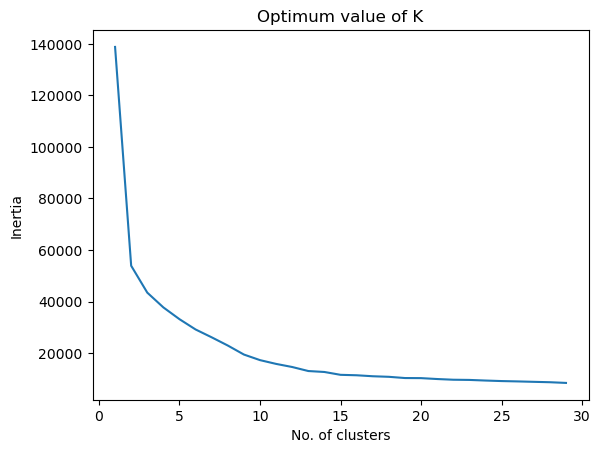

In [73]:
plt.plot(range(1,30),inertia)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Optimum value of K')
plt.show()

### DBSCAN

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [75]:
df2=features2.drop('cluster',axis=1)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [76]:
min_node=range(1,15)
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [77]:
output=[]
for mn in min_node: 
    for ep in eps:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(df2).labels_
        score=silhouette_score(df2,labels)
        output.append([ep,mn,score])

In [78]:
output

[[0.1, 1, -0.021038216193665086],
 [0.2, 1, -0.12761535330982732],
 [0.3, 1, -0.21231134836777277],
 [0.4, 1, -0.22585399189011135],
 [0.5, 1, -0.20393530623322687],
 [0.6, 1, -0.21124195669810034],
 [0.7, 1, -0.16413772937981916],
 [0.1, 2, -0.490382293396472],
 [0.2, 2, -0.5018226302722506],
 [0.3, 2, -0.458312479068752],
 [0.4, 2, -0.3191318949992741],
 [0.5, 2, -0.22436165078450085],
 [0.6, 2, -0.12351521025482495],
 [0.7, 2, -0.08381472009567408],
 [0.1, 3, -0.413779415623254],
 [0.2, 3, -0.5311203327416466],
 [0.3, 3, -0.46140245062686736],
 [0.4, 3, -0.28187060982569667],
 [0.5, 3, -0.11448578186172835],
 [0.6, 3, -0.0651682177174927],
 [0.7, 3, -0.04803503147348774],
 [0.1, 4, -0.32361181056810473],
 [0.2, 4, -0.5101427966864884],
 [0.3, 4, -0.40311253117470874],
 [0.4, 4, -0.2353477834823527],
 [0.5, 4, -0.1003374439521536],
 [0.6, 4, -0.0319636822469941],
 [0.7, 4, 0.0011021637150116297],
 [0.1, 5, -0.319461644046851],
 [0.2, 5, -0.4637282154062364],
 [0.3, 5, -0.362666246712

In [79]:
a=pd.DataFrame(output)
a

,0,1,2
0,0.1,1,-0.021038
1,0.2,1,-0.127615
2,0.3,1,-0.212311
3,0.4,1,-0.225854
4,0.5,1,-0.203935
...,...,...,...
93,0.3,14,-0.042616
94,0.4,14,-0.191114
95,0.5,14,-0.160285
96,0.6,14,-0.053735


In [80]:
a.iloc[:,2].max()

0.07082852650632948

In [81]:
a[a[2]==0.07082852650632948]

,0,1,2
86,0.3,13,0.070829


In [82]:
labels=DBSCAN(eps=0.3,min_samples=13).fit(df2).labels_
labels

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


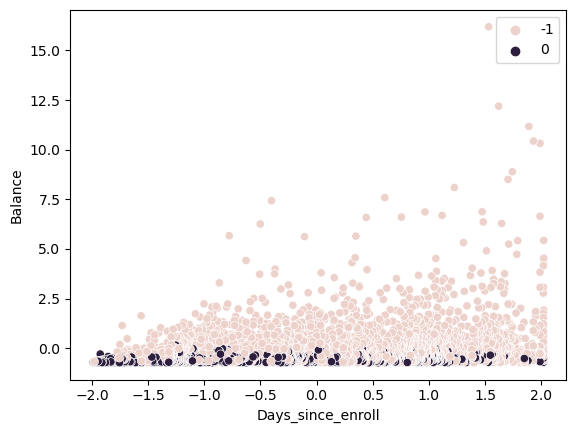

In [83]:
sns.scatterplot(data=df2,x='Days_since_enroll',y='Balance',hue=labels) 
plt.show()